In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

sop1 = pd.read_csv("sop1.csv", index_col=0)
sop2 = pd.read_csv("sop2.csv", index_col=0)
sop3 = pd.read_csv("sop3.csv", index_col=0)

sop1.head(1)

,echo1,echo2,echo3,echo4,shadow5,shadow6,echo7,echo8,echo-contact9,echo-contact10,echo-contact11,echo-contact12,shadow13,shadow14,echo-contact15,echo-contact16
0,,,,,,,,,,,,,,,,
1,0,35,202,27,29,35,0,0,255,147,54,119,125,212,17,39


### Приведение к общей координате

Для того чтобы привести данные к общей координате возьмем два столбца из двух таблиц, посчитаем их корреляцию, потом сместим один из них на 1 мм(т.е. на один наш такт) и снова посчитаем корреляцию. Так сделаем 1020 раз(для полного оборота) и запишем данные в массив. Элемент в массиве с индексом 0 будет соответствовать значению корреляции без смещения, с индексом 1 будет соответстсвовать знач корреляции со сдвигом в 1 мм и так далее. после найдем макс значение корреляции, его индекс и сдвинем данные по этому смещению.

In [95]:
def abc(ser1, ser2):
    C=[]
    S = ser2
    for i in range(1020):
        corr = np.corrcoef(ser1,S)[0][1]
        C.append(corr)
        S = pd.concat([S[1:], S[:1]], ignore_index=True)

    print(max(C),C.index(max(C)))
    return max(C), C.index(max(C))

In [96]:
sop1 = sop1.reset_index()
sop1 = sop1.drop(["0"],axis=1)
sop2 = sop2.reset_index()
sop2 = sop2.drop(["0"],axis=1)
sop3 = sop3.reset_index()
sop3 = sop3.drop(["0"],axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FD2F29B08>,
      dtype=object)

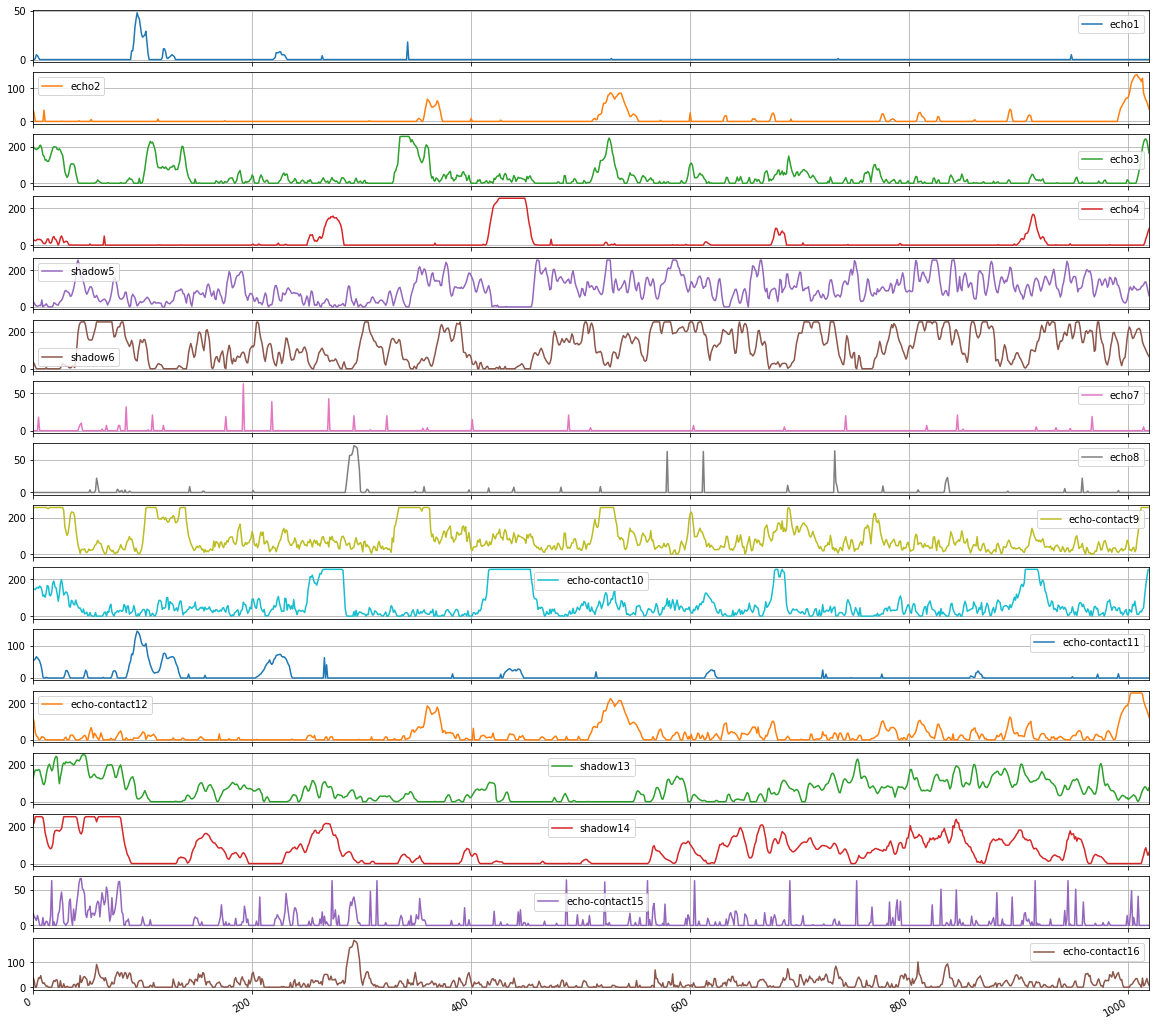

In [98]:
sop1.plot(subplots=True,figsize=(20,20),grid="on")

In [79]:
for col in sop1.columns:
    s1 = sop1[col]
    s2 = sop2[col]
    Max, ind = abc(s1,s2)
    sop2[col] = pd.concat([sop2[col][ind:], sop2[col][:ind]], ignore_index=True)
    print("______________________________________________________")

0.904585241186293 999
______________________________________________________
0.9229499831352458 999
______________________________________________________
0.7442491217179459 998
______________________________________________________
0.9515076603179975 998
______________________________________________________
0.648288541341529 998
______________________________________________________
0.7252089274411726 998
______________________________________________________
0.3496261055900644 71
______________________________________________________
0.7887728843548627 999
______________________________________________________
0.7159233412503354 998
______________________________________________________
0.8250147288940901 998
______________________________________________________
0.8462009566164111 999
______________________________________________________
0.9245841202294527 999
______________________________________________________
0.9471054062513939 998
____________________________________________

In [80]:
for col in sop1.columns:
    s1 = sop1[col]
    s2 = sop3[col]
    Max, ind = abc(s1,s2)
    sop3[col] = pd.concat([sop3[col][ind:], sop3[col][:ind]], ignore_index=True)
    print("______________________________________________________")

0.7568353625841328 479
______________________________________________________
0.3954509551245056 127
______________________________________________________
0.4819835186367073 601
______________________________________________________
0.6656339820403318 600
______________________________________________________
0.4311564151533288 937
______________________________________________________
0.3125286867141036 601
______________________________________________________
0.19279045560362132 442
______________________________________________________
0.7876448569117038 992
______________________________________________________
0.4408408834961053 595
______________________________________________________
0.44481271489453644 348
______________________________________________________
0.49655750961655404 474
______________________________________________________
0.3386405477435791 595
______________________________________________________
0.42767252309661163 643
_____________________________________

In [81]:
sop1.to_csv("sop1_shift.csv")
sop2.to_csv("sop2_shift.csv")
sop3.to_csv("sop3_shift.csv")